In [23]:
import sys
sys.path.append('/Users/isabellechen/git-repos/tutorial/makemore/')

In [24]:
words=open('names.txt','r').read().split()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [25]:
len(words)

32033

In [26]:
min(len(w) for w in words)

2

In [27]:
b={}
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram]=b.get(bigram, 0) + 1
        #print(ch1,ch2)

In [28]:
sorted(b.items(), key=lambda x: x[1], reverse=True)

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

# Transform information in 2D array

In [29]:
import torch

In [34]:
chars = sorted(set(''.join(words)))
char_to_int = {c: i+1 for i, c in enumerate(chars)}
int_to_char = {i+1: c for i, c in enumerate(chars)}
char_to_int['.']=0
int_to_char[0]='.'
N = torch.zeros((27,27), dtype=torch.int32)

In [35]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = char_to_int[ch1]
        ix2 = char_to_int[ch2]
        N[ix1, ix2] += 1

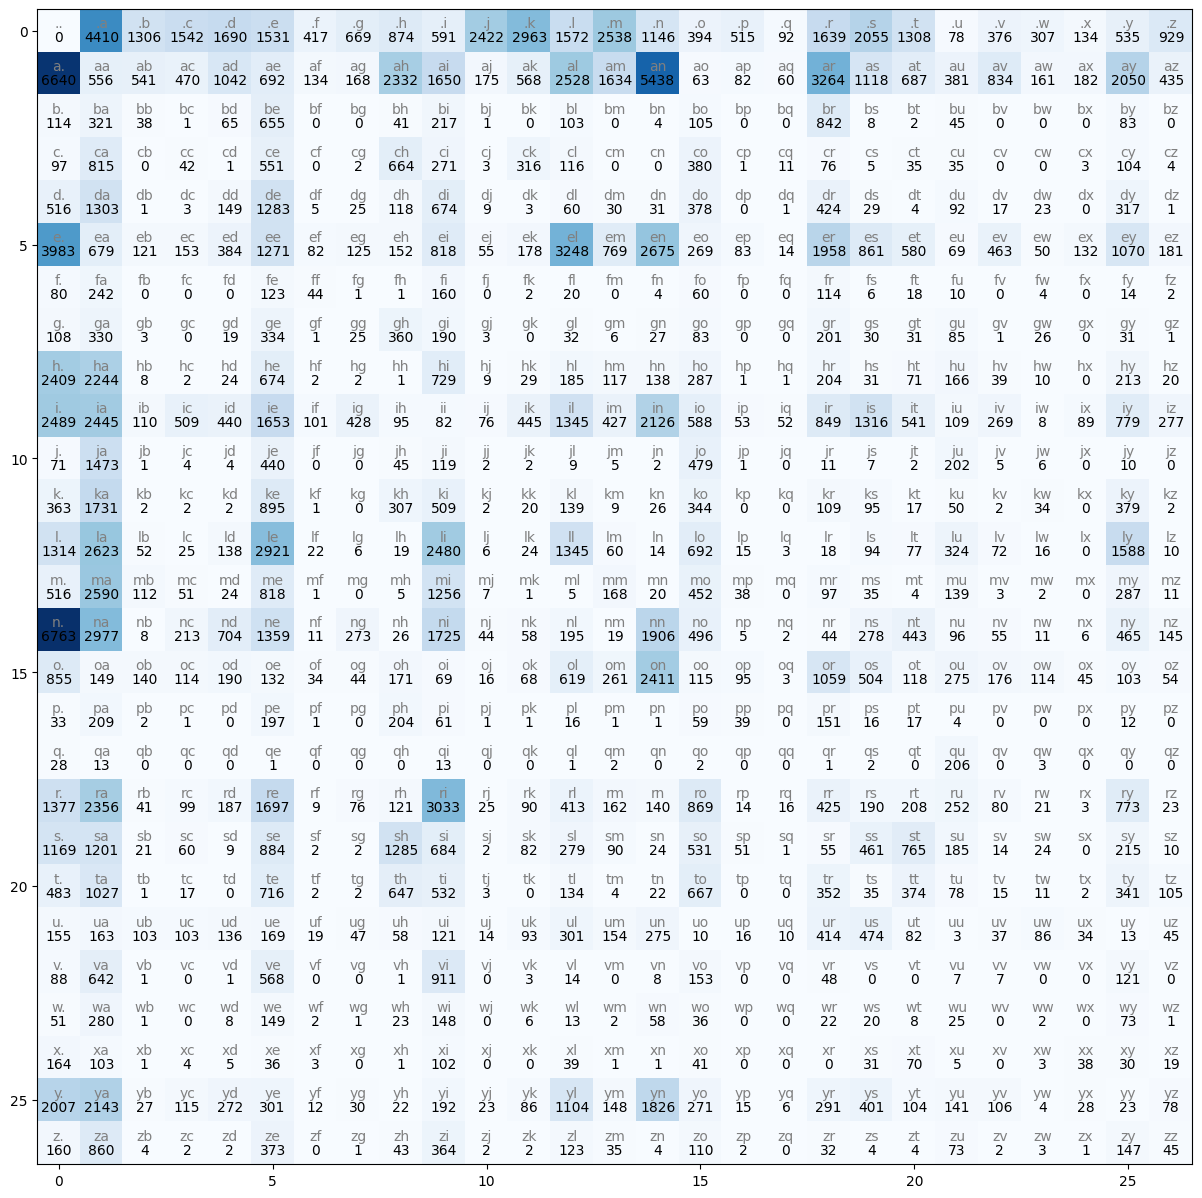

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,15))
plt.imshow(N, cmap='Blues')

for i in range(27):
    for j in range(27):
        chrstr= int_to_char[i]+int_to_char[j]
        plt.text(j, i, chrstr, ha='center', va='bottom', color='grey')
        plt.text(j, i, N[i, j].item(), ha='center', va='top', color='black')

In [48]:
N[0,:]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [49]:
p = N[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [41]:
# g= torch.Generator().manual_seed(2147483647)
# p=torch.rand(3, generator=g)
# p = p / p.sum()
# p
# torch.multinomial(p, num_samples=100, replacement=True, generator=g)

tensor([0.6064, 0.3033, 0.0903])

In [50]:
g= torch.Generator().manual_seed(2147483647)
ix=torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
int_to_char[ix]

'c'

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}